# **MATH&ML-11. Кластеризация и техники понижения размерности. Часть II**

# 1. Введение

✍ В предыдущем модуле мы изучили ряд методов кластеризации и научились применять их для решения практических задач. Однако мы пока не ответили на два вопроса.

Во-первых, мы не разобрались с тем, как оценивать качество.

К сожалению, оценить качество кластеризации сложно, поскольку, в отличие от регрессии или классификации, при кластеризации у нас не всегда есть эталонные ответы, с которыми можно сравнить результаты предсказаний.

Выделяют две больших группы методов, с помощью которых можно оценить результат кластеризации:

**Внутренние меры** — это метрики, которые оценивают качество кластеризации только по той информации, которая есть в неразмеченных данных.

**Внешние меры** — это метрики, которые используют, если в данных есть информация о некотором заранее известном разделении на кластеры, с которым можно сравнить полученный результат.

Разумеется, мы разберём обе группы методов и рассмотрим практически все существующие на данный момент меры, которые можно использовать для оценки качества кластеризации.

Во-вторых, мы упомянули, что из-за большого количества признаков разбиение на кластеры может получиться некачественным и необходимо уменьшать размерность данных, однако не обсудили подходящие для этого алгоритмы.

В этом модуле мы подробно разберём процесс снижения размерности, а также на примере практической задачи увидим, как снижение размерности увеличивает качество кластеризации.

Но прежде чем перейти к изучению материала, давайте повторим то, что вы узнали ранее, так как в этом модуле мы будем активно использовать эти знания. Если какие-то задания вызовут у вас затруднения, рекомендуем ещё раз просмотреть соответствующие юниты предыдущего модуля.

⭐ Отлично! Вы справились со всеми заданиями, а значит, можно переходить к изучению новой темы.

В рамках данного модуля перед нами будут стоять **следующие цели**:

* Изучить метрики, с помощью которых можно оценить качество кластеризации: мы рассмотрим все внешние и внутренние меры, а также на примере практической задачи научимся вычислять их вручную и с помощью библиотеки sklearn.

* Познакомиться с методами снижения размерности: мы узнаем, зачем необходимо уменьшать размерность, изучим алгоритмы, с помощью которых это можно делать, и, конечно, отработаем полученные навыки на практике.

# 2. Оценка качества кластеризации: внутренние меры

✍ В данном юните мы разберём **внутренние меры** оценки качества кластеризации. После изучения предложенного материала вы будете иметь представление обо всех способах оценить качество кластеризации, если неизвестно эталонное разбиение на кластеры, а также будете знать, как вычислить наиболее важные показатели с помощью соответствующих алгоритмов sklearn.

В библиотеке sklearn реализованы три наиболее популярные метрики:

* коэффициент силуэта (Silhouette Coefficient);
* индекс Калински — Харабаса (Calinski-Harabasz Index);
* индекс Дэвиса — Болдина (Davies-Bouldin Index).

Эти метрики мы рассмотрим максимально подробно, а также вычислим каждую из них «вручную». Важно отметить, что вам не потребуется в будущем реализовывать подобные вычисления самостоятельно, однако разбор вычислительных примеров поможет лучше разобраться в том, как рассчитываются значения и каков их смысл.

## КОЭФФИЦИЕНТ СИЛУЭТА

Некоторые внутренние меры вам уже знакомы по предыдущему модулю, например коэффициент силуэта. Мы не зря акцентируем на нём внимание — именно он используется чаще всего и именно о нём вас с наибольшей вероятностью могут спросить на собеседовании. Обсудим коэффициент силуэта немного подробнее.

Напомним, что коэффициент силуэта вычисляется по следующей формуле:

$$s_{i}=\frac{\left(b_{i}-a_{i}\right)}{\max \left(a_{i}, b_{i}\right)},$$

где:

$a_i$ — среднее расстояние от данного объекта $x_i$ до объектов из того же кластера;
$b_i$ — среднее расстояние от данного объекта $x_i$ до объектов из другого ближайшего кластера.

Давайте рассмотрим вычисление коэффициента силуэта на примере.

Допустим, у нас есть семь объектов, разделённых на три кластера.

* Кластер 1:
    * $x_1(3,1)$;
    * $x_2(0,1)$;
    * $x_3(3,5)$;
* Кластер 2:
    * $x_4 (0,7)$;
    * $x_5(0,9)$;
* Кластер 3:
    * $x_6 (-12,1)$;
    * $x_7(-6,-7)$.

![](https://lms.skillfactory.ru/assets/courseware/v1/1a0846b49b840ad18bd95a651648fafa/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_2_1.png)

Найдём коэффициент силуэта для точки $x_2$. Для начала рассчитаем расстояния от точки $x_2$ до точек, принадлежащих её кластеру:

Расстояние от $x_2$ до $x_1$:  
$d\left(x_{1}, x_{2}\right)=\sqrt{(3-0)^{2}+(1-1)^{2}}=\sqrt{9}=3$  
Расстояние от $x_2$ до $x_3$:  
$d\left(x_{2}, x_{3}\right)=\sqrt{(3-0)^{2}+(5-1)^{2}}=\sqrt{9+16}=\sqrt{25}=5$  

Теперь нам необходимо найти среднее арифметическое для этих расстояний:  
$a_2 =\frac{3+5}{2}=4$

Далее нужно вычислить среднее расстояние от $x_2$ до объектов из другого ближайшего кластера. Мы не можем сразу определить, какой кластер будет ближайшим, поэтому вычислим средние расстояния до обоих кластеров, а потом возьмём наименьшее.

Для начала найдём расстояния до элементов кластера 2:

от $x_2$ до $x_4$:  
$\sqrt{(0-0)^{2}+(7-1)^{2}}=6$  
от $x_2$ до $x_5$:  
$\sqrt{(0-0)^{2}+(9-1)^{2}}=8$  

Среднее расстояние равно:  
$\frac{6+8}{2}=7$

Теперь рассчитаем расстояния до элементов кластера 3:

от $x_2$ до $x_6$:  
$\sqrt{(-12-0)^{2}+(1-1)^{2}}=12$  
от $x_2$ до $x_7$:  
$\sqrt{(-6-0)^{2}+(-7-1)^{2}}=10$  

Среднее расстояние будет следующим:  
$\frac{10+12}{2}=11$

Среднее расстояние до кластера 2 меньше ($7 < 11$), так что будем использовать его.

Итак, рассчитаем коэффициент силуэта:  
$s_{2}=\frac{\left(b_{2}-a_{2}\right)}{\max \left(a_{2}, b_{2}\right)}$



В данном случае $a_2=4$, $b_2=7$:  
$s_{2}=\frac{\left(7-4\right)}{\max \left(4, 7\right)} = \frac{3}{7}$

Отлично, мы нашли значение коэффициента силуэта для $x_2$. Для того чтобы найти итоговое значение коэффициента силуэта для выборки, необходимо найти значения для остальных шести объектов, а затем усреднить семь значений, однако мы опустим эти вычисления — надеемся, что алгоритм действий вам уже и так понятен.

При решении практических задач вы будете использовать уже готовые алгоритмы на Python. Для вычисления коэффициента силуэта в библиотеке sklearn используется [silhouette_score:](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

```py
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента силуэта
score = silhouette_score(X, km.labels_, metric='euclidean')
```

Значение коэффициента силуэта всегда находится в диапазоне [−1,1].

* Значение близко к −1: объекты в кластерах разрознены, и в целом кластерную структуру не удалось выделить.
* Значение близко к 0: кластеры пересекаются друг с другом.
* Значение близко к 1: чёткая кластерная структура с «плотными», отделёнными друг от друга кластерами.  

Также мы можем изобразить распределение коэффициентов силуэта для объектов отдельных кластеров.

Например, визуализация для двух кластеров будет такой:

![](https://lms.skillfactory.ru/assets/courseware/v1/996f63d2b21ea1ed1e682f481408d80a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_2_2.png)

**Пояснение**. На графике слева красной пунктирной линией здесь и далее отмечено среднее значение коэффициента силуэта для данного случая кластеризации. Разными цветами (серый и зелёный) визуализированы распределения значений коэффициентов силуэта для объектов соответствующих кластеров. На графике справа отмечены объекты, окрашенные в разные цвета в соответствии с их принадлежностью к кластерам.

Здесь мы видим, что «нулевой» кластер (серого цвета) включает в себя точки с более маленькими значениями. Это довольно хорошо соотносится с правой визуализацией, т. к. в сером кластере точки местами разрознены сильнее, чем в зелёном.

Для случая трёх кластеров ситуация будет следующей:

![](https://lms.skillfactory.ru/assets/courseware/v1/a530370f7356949ad377fa0269a1c5df/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_2_3.png)

Довольно естественно (если посмотреть на график справа), что голубой кластер показывает наилучшую согласованность. У точек серого кластера коэффициенты всё так же самые низкие — явно напрашивается его разделение на ещё два кластера, и это действительно улучшает качество, так как значения коэффициентов силуэта увеличились (в новых сером и жёлтом кластерах они выше, чем были в предыдущем сером):

![](https://lms.skillfactory.ru/assets/courseware/v1/79bc088189150bf15c1e9800378ad3a4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_2_4.png)




## ИНДЕКС КАЛИНСКИ — ХАРАБАСА

Следующий коэффициент, который мы рассмотрим, — это **индекс Калински — Харабаса**. Он показывает отношение между разбросом значений между кластерами и разбросом значений внутри кластеров и вычисляется по следующей формуле:

$$\frac{SS_B}{SS_W}\times\frac{N-K}{K-1}$$

В данной формуле:

* $N$ — общее количество объектов;
* $K$ — количество кластеров;
* $SS_B$ — взвешенная межкластерная сумма квадратов расстояний;
* $SS_W$ — внутрикластерная сумма квадратов расстояний.

Несмотря на внешнюю лаконичность формулы, её довольно сложно применять. Чтобы лучше понять её компоненты, давайте рассмотрим нахождение индекса по шагам.

**Примечание**. Важно отметить, что вам не потребуется вычислять данное значение «вручную» или моментально воспроизводить эту формулу по памяти: все вычисления так подробно мы приводим для того, чтобы вы лучше поняли принцип действия этой меры.

**Первый шаг** — рассчитать взвешенную межкластерную сумму квадратов расстояний:

$$SS_B=\sum_{k=1}^{K} n_{k} \times\left\|C_{k}-C\right\|^{2}$$

В данной формуле:

* $n_k$ — количество наблюдений в кластере $k$;
* $C_k$ — центроид кластера $k$;
* $C$ — центроид всего набора данных;
* $K$ — количество кластеров.

Вспомним пример, который мы рассматривали для вычисления коэффициента силуэта:

![](https://lms.skillfactory.ru/assets/courseware/v1/efe2d119647b7f19417da61bc73b6c71/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_2_6.png)

* Кластер 1:
    * $x_1(3,1)$;
    * $x_2(0,1)$;
    * $x_3(3,5)$;  

* Кластер 2:
    * $x_4 (0,7)$;
    * $x_5(0,9)$;  

* Кластер 3:
    * $x_6 (-12,1)$;
    * $x_7(-6,-7)$.  

В данном случае $K=3$, $n_1=3$, $n_2=2$, $n_3=2$.

Находим центроиды кластеров. Напомним, что для этого необходимо просто усреднить координаты объектов:

$C_1(\frac{3+0+3}{3},\frac{1+1+5}{3})=C_1(2,\frac{7}{3})$

$C_2(\frac{0+0}{2},\frac{7+9}{2})=C_2(0,8)$

    

Вычислим центроид для всего набора данных:

$C(\frac{3+0+3+0+0-12-6}{7},\frac{1+1+5+7+9+1-7}{7})=C(\frac{-12}{7},\frac{17}{7})$

Далее необходимо рассчитать квадраты расстояний от центроидов кластеров до центроида данных:

* Для первого кластера:

    $(-\frac{12}{7}-2)^2+(\frac{17}{7}-\frac{7}{3})^2\approx 13.81$

* Для второго кластера:

    $(-\frac{12}{7}-0)^2+(\frac{17}{7}-8)^2\approx 33.98$

* Для третьего кластера:

    $(-\frac{12}{7}+9)^2+(\frac{17}{7}+3)^2\approx 82.55$

Теперь можно найти итоговый результат:

$SS_B=\sum_{k=1}^{K} n_{k} \times\left\|C_{k}-C\right\|^{2}=3\cdot13.81+2\cdot33.98+2\cdot82.55=274.49$

**Обращаем ваше внимание**, что в процессе вычислений на некоторых шагах мы делали округление до сотых для компактности вычислений, однако при реализации в Python округления, разумеется, не производится.

**Второй шаг** — рассчитать внутрикластерную сумму квадратов.

$$SS_W = \sum_{i=1}^{n_{k}}\left\|X_{i k}-C_{k}\right\|^{2}$$

В данной формуле:

* $n_k$ — количество наблюдений в кластере $k$;
* $X_{ik}$ — $i$-ое наблюдение в кластере $k$;
* $C_k$ — центроид кластера $k$.

Такое значение мы рассчитываем для каждого кластера, а потом уже складываем их для получения значения $SS_W$. Итак, рассчитаем значения для каждого из трёх кластеров.

* Для первого:

    $(2-3)^2+(\frac{7}{3}-1)^2=\frac{25}{9}$  
    $(2-0)^2+(\frac{7}{3}-1)^2=\frac{52}{9}$  
    $(2-3)^2+(\frac{7}{3}-5)^2=\frac{73}{9}$  
    $\frac{25}{9}+\frac{52}{9}+\frac{73}{9}=\frac{50}{3}\approx16.67$

* Для второго:

    $(0-0)^2+(8-7)^2=1$  
    $(0-0)^2+(8-9)^2=1$  
    $1+1=2$

* Для третьего:

    $(-9+12)^2+(-3-1)^2=25$  
    $(-9+6)^2+(-3+7)^2=25$  
    $25+25=50$



Складываем значения для всех кластеров:

$SS_W=16.67+2+50=68.67$

Теперь мы, наконец, можем вычислить значение индекса:

$\frac{S S_{B}}{S S_{W}} \times \frac{(N-K)}{(K-1)} = \frac{274.49}{68.67}\times \frac{(7-3)}{(3-1)} \approx 7.99$

Важно отметить, что нет никакого «приемлемого» порогового значения индекса — скорее, его можно использовать для того, чтобы сравнивать разные разбиения на кластеры между собой: более высокое значение индекса будет означать, что кластеры плотные (т. е. объекты внутри них находятся близко друг к другу) и хорошо разделены. Например, если бы мы отразили зависимость показателя индекса от количества кластеров, то по графику ниже могли бы сделать вывод, что оптимальное количество кластеров будет равно трём, так как именно для этого числа кластеров значение индекса наибольшее:

![](https://lms.skillfactory.ru/assets/courseware/v1/e24e1cd52f48aef6ac7662d26eb7f31e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_2_7.png)

**Пояснение**: по оси абсцисс здесь отложено количество кластеров, а по оси ординат — значение индекса Калински — Харабаса.

В библиотеке sklearn данный алгоритм реализуется с помощью метода [calinski_harabasz_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html):

```py
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Калински — Харабаса
score = calinski_harabasz_score(X, km.labels_)
```

## ИНДЕКС ДЭВИСА — БОЛДИНА

Перейдём к последнему из трёх наиболее важных для нас коэффициентов — **индексу Дэвиса — Болдина**. Рассмотрим процесс его вычисления сразу по шагам, так как он реализуется достаточно сложно.

### Первый шаг

Для начала вычисляем для каждого кластера следующую меру разброса значений внутри него:

$$S_{k}=\left\{\frac{1}{n_{k}} \sum_{i=1}^{n_{k}}\left|X_{i k}-C_{k}\right|^{q}\right\}^{\frac{1}{q}}$$

В данной формуле:

$n_k$ — количество наблюдений в кластере $k$;
$X_{ik}$ — $i$-ое наблюдение в кластере $k$;
$C_k$ — центроид кластера $k$;
$q$ обычно принимает значение $2$ (в этом случае мы рассматриваем уже привычное нам евклидово расстояние).

### Второй шаг

Далее находим расстояния между центроидами кластеров:

$$M_{i, j}=\left\|C_{i}-C_{j}\right\|_{q}$$

Будем считать, что мы работаем с тремя кластерами. Используя приведённую выше формулу, вычислим меру отделимости для всех возможных комбинаций из двух кластеров: $M_{11}$, $M_{12}$, $M_{13}$, $M_{21}$, $M_{22}$, $M_{23}$, $M_{31}$, $M_{32}$ и $M_{33}$.

Разумеется, расстояния $M_{11}$, $M_{22}$, $M_{33}$ будут равны нулю. Также будут расстояния, равные друг другу: $M_{12}=M_{21}$, $M_{13}=M_{31}$, $M_{23}=M_{32}$.

### Третий шаг

Теперь для каждой пары кластеров вычисляем следующее отношение:

$$R_{i j}=\frac{S_{i}+S_{j}}{M_{i j}}$$

Также для каждого кластера находим максимум из полученных значений:

$$R_i\equiv maximum (R_{ij})$$



### Четвёртый шаг

Усредняем значения, найденные в предыдущем пункте, — это и будет итоговое значение индекса:

$$DBI=\frac{1}{N}\sum^{N}_{i=1}R_i$$

Давайте реализуем эти вычисления всё для того же примера, который мы использовали для вычисления предыдущих двух метрик. Напомним его.

* Кластер 1:
    * $x_1(3,1)$;
    * $x_2(0,1)$;
    * $x_3(3,5)$;  

* Кластер 2:
    * $x_4 (0,7)$;
    * $x_5(0,9)$;  

* Кластер 3:
    * $x_6 (-12,1)$;
    * $x_7(-6,-7)$. 

В первую очередь необходимо вычислить для каждого кластера значение компактности:

$$S_{k}=\left\{\frac{1}{n_{k}} \sum_{i=1}^{n_{k}}\left|X_{i k}-C_{k}\right|^{2}\right\}^{\frac{1}{2}}$$

Мы уже вычислили часть этой формулы для всех кластеров, когда разбирали предыдущую меру (известная нам часть обведена в рамку):

![](https://lms.skillfactory.ru/assets/courseware/v1/d70a949cbc1312cbb0d9fc7e41c533bf/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_2_8.png)

Так что воспользуемся этими значениями для нахождения значений компактности:

$S_1=(\frac{1}{3}\ast 16.67)^{\frac{1}{2}}\approx 2.36$

$S_2=(\frac{1}{2}\ast 2)^{\frac{1}{2}}=1$

$S_3=(\frac{1}{2}\ast 50)^{\frac{1}{2}}=5$

Теперь необходимо оценить отделимость — вычислить попарные расстояния между центроидами. У нас их будет всего три:

$M_{12}=\sqrt{(0-2)^2+(8-\frac{7}{3})^2}\approx 6.01$

$M_{13}=\sqrt{(-9-2)^2+(-3-\frac{7}{3})^2}\approx 12.22$

$M_{23}=\sqrt{(-9-0)^2+(-3-8)^2}\approx 14.21$

Далее вычисляем следующие промежуточные показатели:

$R_{12}=\frac{S_1+S_2}{M_{12}}=\frac{2.36+1}{6.01}\approx 5.56$

$R_{13}=\frac{S_1+S_3}{M_{13}}=\frac{2.36+5}{12.22}\approx 0.6$

$R_{23}=\frac{S_2+S_3}{M_{23}}=\frac{1+5}{14.21}\approx 0.42$





Находим из этих значений максимальное для каждого кластера:

$R_1= 0.6$

$R_2= 0.56$

$R_3=0.6$

Теперь усредняем их для получения итогового результата:

$DBI = \frac{(0.6+0.56+0.6)}{3}\approx 0.59$

Отлично, мы получили итоговое значение индекса.

Давайте разберёмся, как интерпретировать значение коэффициента Дэвиса — Болдина. Индекс показывает среднюю «схожесть» между кластерами, и 0 — это минимально возможное значение. Разумеется, так как мы хотим, чтобы кластеры были максимально различными (т. е. имели низкую схожесть), мы должны пытаться достичь как можно более маленького значения.

В библиотеке sklearn индекс Дэвиса — Болдина реализуется с помощью метода [davies_bouldin_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html):

```py
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Дэвиса — Болдина
score = davies_bouldin_score(X, km.labels_)
```

Итак, мы рассмотрели три наиболее популярных метрики, которые обычно вычисляются при кластеризации и заложены в библиотеке sklearn. Однако есть ещё ряд показателей, с которыми вы можете столкнуться в различных источниках. Несмотря на то что они не реализованы в готовых библиотеках Python, о них часто упоминают, когда речь идёт об оценке качества кластеризации. Мы не будем подробно рассматривать вычисления для них, однако ознакомимся с их сутью, чтобы вы могли составить полную картину.

## ВНУТРИКЛАСТЕРНОЕ РАССТОЯНИЕ

Для того чтобы оценить качество кластеризации, можно вычислить суммарное внутрикластерное расстояние:

$$F_0 = \sum_{k=1}^{K} \sum_{i=1}^{N}\left[a\left(x_{i}\right)=k\right] \rho\left(x_{i}, c_{k}\right)$$

В данном случае $\rho\left(x,c\right)$ — это некоторая функция расстояния.

В формуле заложен индикатор того, принадлежит ли объект кластеру, и мы проходимся по всем объектам (от $1$ до $N$) и всем кластерам (от $1$ до $K$). С помощью этого индикатора мы выясняем для каждого объекта, принадлежит ли он к данному кластеру, и, если да, считаем расстояние до центроида кластера.

Разумеется, сумма этих расстояний должна быть минимальной — это тот случай, когда все элементы кластера совпадают с центроидом.

## МЕЖКЛАСТЕРНОЕ РАССТОЯНИЕ

Аналогично суммарному внутрикластерному расстоянию, вводится межкластерное расстояние:

$$F_0 = \sum_{i, j=1}^{N}\left[a\left(x_{i}\right) \neq a\left(x_{j}\right)\right] \rho\left(x_{i}, x_{j}\right)$$

Мы проверяем, что предсказания о принадлежности к кластеру не равны (т. е. объекты относятся к разным кластерам), и считаем расстояние между этими объектами (можем использовать различные функции расстояний). Здесь мы, разумеется, будем максимизировать результат, так как нам важно, чтобы элементы из разных кластеров были как можно меньше похожи друг на друга, а значит, чтобы расстояние между ними было как можно больше.

## ОТНОШЕНИЕ РАССТОЯНИЙ

Логичным образом из предыдущих двух метрик (внутрикластерного и межкластерного расстояний) мы получаем отношение расстояний:

$$\frac{F_0}{F_1}\rightarrow \min$$

Таким образом мы можем учитывать оба функционала, рассмотренные ранее (расстояние внутри кластера и между кластерами), и оптимизировать отношение расстояний. Естественно, нам нужно, чтобы оно было минимальным — это будет достигаться, если расстояние между кластерами максимально, а внутри кластера — минимально.

ВНУТРЕННЯЯ МЕРА|ИНТЕРПРЕТАЦИЯ|ДИАПАЗОН ЗНАЧЕНИЙ|ФУНКЦИЯ В БИБЛИОТЕКЕ SKLEARN
-|-|-|-
**Коэффициент силуэта**|Мера того, насколько объект похож на объекты из своего собственного кластера по сравнению с объектами из других кластеров.|От -1 до 1: при качественной кластеризации значение близко к 1.|silhouette_score()
**Индекс Калински — Харабаса**|Показывает отношение между разбросом значений между кластерами и разбросом значений внутри кластеров. Оценка выше, когда кластеры плотные и хорошо разделены.|Любое неотрицательное значение. Чем больше значение, тем лучше.|calinski_harabasz_score()
**Индекс Дэвиса — Болдина**|Показывает среднюю «схожесть» между кластерами.|Не менее 0. Чем меньше значение, тем лучше.|davies_bouldin_score()
**Внутрикластерное расстояние**|Показывает, насколько плотно расположены объекты в кластерах.|Не менее 0. Чем меньше значение, тем лучше.|Не реализовано
**Межкластерное расстояние**|Показывает, насколько далеки друг от друга элементы из разных кластеров.|Не менее 0. Чем больше значение, тем лучше.|Не реализовано

В следующем юните мы изучим внешние меры, которые используются в случае, когда известно эталонное разбиение на кластеры. После этого мы сравним различные алгоритмы кластеризации на примере практической задачи с использованием изученных мер →

# 3. Оценка качества кластеризации: внешние меры

✍ В предыдущем юните мы рассмотрели меры, которые можно использовать для оценки качества кластеризации, если данные являются полностью неразмеченными. Однако иногда бывает такое, что какая-то разметка в наших данных всё же есть. В этом случае мы можем использовать дополнительные показатели, которые помогут оценить качество кластеризации.

В данном юните мы рассмотрим **внешние меры**. Часть из них вы уже изучали, однако сейчас мы опишем их более строго с формальной точки зрения и будем концентрироваться не только на их смысле, но и на математической составляющей. Также мы познакомимся с некоторыми мерами, которые не рассматривали ранее.

## ИНДЕКС РЭНДА

Первая внешняя мера, которую мы рассмотрим, — это **индекс Рэнда**. В целом, это не совсем метрика для оценки качества кластеризации: индекс Рэнда — это мера сходства между двумя кластеризациями. Однако, так как он позволяет сравнить два разбиения на кластеры, мы можем использовать его для сравнения фактических меток классов и прогнозируемых меток кластеров, тем самым оценивая качество наших алгоритмов.

Данный индекс сравнивает фактическое разбиение и результат применения алгоритма кластеризации и оценивает, сколько пар, находившихся в одном или в разных кластерах, сохранили это состояние.

Индекс Рэнда вычисляется по следующей формуле:

$$RI=\frac{2(a+b)}{N(N-1)},$$

где

* $N$ — количество объектов в выборке;
* $a$ — число пар объектов, которые имеют одинаковые метки (т. е. в фактическом разбиении находятся в одном классе) и располагаются в одном кластере;
* $b$ — число пар объектов, которые имеют различные метки (т. е. в фактическом разбиении находятся в разных классах) и располагаются в разных кластерах.

**Обратите внимание**, что знаменатель здесь выражает общее количество пар, которые можно получить из нашего набора данных. То есть, по сути, в этом индексе вычисляется доля пар, для которых сохранилось их расположение по отношению друг к другу.

Рассмотрим пример вычисления индекса Рэнда.

Допустим в нашем наборе данных есть пять элементов: $(A, B, C, D, E)$.

Мы предполагаем, что изначально они принадлежат к двум классам, и вектор их меток выглядит следующим образом: $(1, 1, 1, 2, 2)$. По результатам кластеризации объектам были присвоены следующие метки принадлежности к кластерам: $(1, 1, 2, 2, 3)$.

![](https://lms.skillfactory.ru/assets/courseware/v1/3da733c8e529d07e81ef20915295f170/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_3_1.png)

**Примечание**. Здесь цветами кругов отмечены кластеры, а цветами букв — истинные метки.

Для того чтобы вычислить индекс Рэнда, в первую очередь необходимо выписать все неупорядоченные (т. е. без учёта их последовательности) пары объектов. Они будут следующими:

$\left\{A, B\right\}, \left\{A, C\right\}, \left\{A, D\right\}, \left\{A, E\right\}, \left\{B, C\right\}, \left\{B, D\right\}, \left\{B, E\right\}, \left\{C, D\right\}, \left\{C, E\right\}, \left\{D, E\right\}$

Теперь нам необходимо найти для формулы индекса Рэнда значение $$, отвечающее за число пар объектов, имеющих одинаковые метки и находящихся в одном и том же кластере. Такая пара у нас только одна — $\{A, B\}$, а значит, $a = 1$.

Далее найдём значение $b$, отражающее число пар объектов, имеющих различные метки в фактическом разбиении и находящихся в разных кластерах. Таких пар у нас пять: $\left\{A, D\right\}, \left\{A, E\right\}, \left\{B, D\right\}, \left\{B, E\right\}, \left\{C, E\right\}$. Итак, $b=5$.

Теперь мы можем найти индекс Рэнда:

$R = \frac{2 (a+b)} {5(5-1)} = \frac{(1+5)} {10} = \frac{6}{10}$

Получается, что индекс Рэнда равен $0.6$. Из этого можно сделать вывод, что разбиения довольно сильно схожи (так как значение ближе к $1$, чем к $0$), однако полного совпадения не достигается.

Для вычисления индекса Рэнда с помощью библиотеки sklearn можно использовать метод [rand_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html):


In [1]:
from sklearn.metrics import rand_score

print(rand_score([1, 1, 1, 2, 2], [1, 1, 2, 2, 3]))

0.6


Заметьте, мы получим такой же результат — $0.6$.

Также используют **скорректированный индекс Рэнда (Adjusted Rand Index)**:

$$ARI=\frac{RI-E[RI]}{\max(RI)-E[RI]}$$

Его преимущество перед обычным индексом Рэнда состоит в том, что при случайных кластеризациях его значение близко к нулю вне зависимости от количества кластеров и наблюдений.

Исправленный индекс Рэнда в sklearn представлен через метод [adjusted_rand_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score).

Интерпретация скорректированного индекса Рэнда:

* Отрицательные значения индекса говорят о различных, независимых разбиениях.
* Значения, близкие к нулю, являются индикаторами случайного разбиения.
* Положительные значения показывают схожесть разбиений (значение, равное $1$, получается при полном совпадении кластеризаций).

## НОРМАЛИЗОВАННАЯ ВЗАИМНАЯ ИНФОРМАЦИЯ

Следующая мера — **NMI (Normalized Mutual Information)**, или нормализованная взаимная информация. Она определяется следующим образом:

$$N M I(Y_{true}, Y_{pred})=\frac{2 \times I(Y_{true} ; Y_{pred})}{[H(Y_{true})+H(Y_{pred})]}$$

Здесь:

* $Y_{true}$ — реальные значения меток кластеров для элементов;
* $Y_{pred}$ — предсказанные значения меток кластеров для элементов;
* $H()$ — функция, которая называется критерием информативности, или энтропией Шеннона;
* $I()$ — функция взаимной информации.

Давайте на примере рассмотрим, как можно применить эту формулу для оценки качества кластеризации.

Пусть у нас есть три класса объектов, которые разбили на два кластера:

![](https://lms.skillfactory.ru/assets/courseware/v1/14baec55ebacb637638cf02699bae752/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_3_2.png)

Для начала рассчитаем энтропию Шеннона. Напомним, что она вычисляется следующим образом:

$$H(Y_{true})=-\sum_{i=1}^{n}P(y_i)\ast \log P(y_i)$$

В данной формуле:

* $n$  — количество объектов;
* $y_i$  — различные значения принадлежности к кластерам.

Посмотрим, как вычислить значения энтропии, которые находятся в знаменателе.

Сначала посчитаем вероятности принадлежности к различным классам:

$P(Y_{true}=1)=\frac{5}{20}=\frac{1}{4}$

$P(Y_{true}=2)=\frac{5}{20}=\frac{1}{4}$

$P(Y_{true}=3)=\frac{10}{20}=\frac{1}{2}$

После этого вычислим энтропию (в качестве основания логарифма выступает $2$):

$H(Y_{true})=-\frac{1}{4}\log(\frac{1}{4})-\frac{1}{4}\log(\frac{1}{4})-\frac{1}{2}\log(\frac{1}{2})=1.5$

Повторяем то же самое для принадлежности к кластерам:

$P(Y_{pred}=1)=\frac{10}{20}=\frac{1}{2}$

$P(Y_{pred}=2)=\frac{10}{20}=\frac{1}{2}$

$H(Y_{pred})=-\frac{1}{2}\log(\frac{1}{2})-\frac{1}{2}\log(\frac{1}{2})=1$

Отлично, значения для знаменателя получены. Для того чтобы вычислить значение из числителя, необходимо вычислить взаимную информацию, которая выражается следующим образом:

$$I(Y_{true},Y_{pred})=H(Y_{true})-\sum_{k=1}^{K}H_{k}(Y_{true}\mid Y_{pred}=k)$$

Для этого найдём условные вероятности для первого кластера:

$P(Y_{true}=1\mid Y_{pred}=1)=\frac{3}{10}$

$P(Y_{true}=2\mid Y_{pred}=1)=\frac{3}{10}$

$P(Y_{true}=3\mid Y_{pred}=1)=\frac{4}{10}$

и вычислим условную энтропию:

$H(Y_{true} \mid Y_{pred}=1)=-P(Y_{pred}=1) \sum_{y \in\{1,2,3\}} P(Y_{true}=y \mid Y_{pred}=1) \log (P(Y_{true}=y \mid Y_{pred}=1))=$
$=-\frac{1}{2} \times\left[\frac{3}{10} \log \left(\frac{3}{10}\right)+\frac{3}{10} \log \left(\frac{3}{10}\right)+\frac{4}{10} \log \left(\frac{4}{10}\right)\right]=0.7855$

Повторим это для второго кластера:

$P(Y_{true}=1\mid Y_{pred}=2)=\frac{2}{10}$

$P(Y_{true}=2\mid Y_{pred}=2)=\frac{7}{10}$

$P(Y_{true}=3\mid Y_{pred}=2)=\frac{1}{10}$

$H(Y_{true} \mid Y_{pred}=2)=-P(Y_{pred}=2) \sum_{y \in\{1,2,3\}} P(Y_{true}=y \mid Y_{pred}=2) \log (P(Y_{true}=y \mid Y_{pred}=2))=$
$=-\frac{1}{2} \times\left[\frac{2}{10} \log \left(\frac{2}{10}\right)+\frac{7}{10} \log \left(\frac{7}{10}\right)+\frac{1}{10} \log \left(\frac{1}{10}\right)\right]=0.5784$

И, наконец, вычислим значение показателя нормализованной общей информации:

$I(Y_{true},Y_{pred})=H(Y_{true})-\sum_{k=1}^{K}H_{k}(Y_{true}\mid Y_{pred}=k)=1.5-[0.7855+0.5784]=0.1361$

$N M I(Y_{true}, Y_{pred})=\frac{2 \times I(Y_{true} ; Y_{pred})}{[H(Y_{true})+H(Y_{pred})]}$

$N M I(Y_{true}, Y_{pred})=\frac{2 \times 0.1361}{[1.5+1]}=0.1089$

**Обращаем ваше внимание**, что при вычислении в Python значение будет отличаться в силу того, что при расчёте энтропии у логарифма могут быть разные основания: мы рассмотрели логарифм с основанием 2 для простоты вычислений, а в библиотеке sklearn используется натуральный логарифм. Однако, разумеется, данные вычисления носят лишь ознакомительный характер (чтобы было понятнее, как реализуется мера), и их не потребуется когда-либо вычислять вручную.

В sklearn для вычисления NMI существует метод [normalized_mutual_info_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score).

С точки зрения оценки качества разбиения коэффициент должен быть как можно ближе к единице: нулевое значение указывает на случайное разбиение, а 1 — на максимальную согласованность. В нашем случае значение получилось ближе к 0, но, учитывая предложенное разбиение (далёкое от необходимого), это ожидаемый результат.

### ОДНОРОДНОСТЬ

Следующая метрика, которую мы рассмотрим, вам уже известна — это **однородность** (ещё её называют **гомогенностью**). Она показывает, насколько элементы в кластере похожи между собой, и вычисляется по следующей формуле:

$$homogeneity=1-\frac{H(Y_{true}\mid Y_{pred})}{H(Y_{true})}$$

Мы не будем приводить здесь полные вычисления этой метрики из-за их сложности. В данной формуле, как и в предыдущей, используется энтропия, так что при желании вы можете попрактиковаться в её использовании, однако на практике это не понадобится.

Однородность также можно вычислить, воспользовавшись методом [homogeneity_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) из библиотеки sklearn.

Важно, чтобы показатель гомогенности был как можно ближе к единице: это говорит о том, что в кластере находятся элементы одного и того же класса. Если он близок к нулю, это означает, что в кластере находятся элементы из разных классов.

### ПОЛНОТА

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, оказались в одном кластере.

$$completeness=1-\frac{H(Y_{pred}\mid Y_{true})}{H(Y_{pred})}$$

По аналогии с однородностью, важно, чтобы значение метрики было близко к единице.

Для вычисления полноты с помощью библиотеки sklearn используется метод [completeness_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score).

Рассмотрим два примера.

![](https://lms.skillfactory.ru/assets/courseware/v1/cf99941643e7fbda4d7c077e5513c483/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_3_3.png)

Однородность на данной диаграмме максимальна, так как в каждом кластере объекты имеют одну и ту же метку класса, однако полнота, наоборот, низкая, так как не все точки одной метки попали в один кластер.

![](https://lms.skillfactory.ru/assets/courseware/v1/5fd766edd2aa31d31f9dc903375a8f4d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_3_4.png)

А вот на этой диаграмме полнота максимальная, так как все объекты одного класса находятся в одном и том же кластере, но при этом однородность низкая, так как в первом кластере находятся объекты из разных классов.

Эти примеры говорят нам о том, что высокий показатель для одной из метрик совершенно не является свидетельством качественного разбиения и необходимо рассматривать несколько мер.

### V-МЕРА

Мы уже выяснили, что лучше рассматривать несколько мер сразу, так как каждая мера в отдельности может показывать высокое качество даже для плохого разбиения. В ответ на такую необходимость появляется метрика, которая является комбинацией метрик полноты и однородности и вычисляется как их гармоническое среднее, — это **V-мера**:

$$v=\frac{(1 \ + \ \beta) \ \times \ homogeneity \ \times \ completeness}{(\beta \ \times \ homogeneity \ + \ completeness)}$$ 

Напомним, что по умолчанию $\beta=1$, но это значение можно варьировать, если хочется придать разный вес разным свойствам:

* Если однородность кластеров важнее, чем их полнота, следует указать значение $\beta<1$. Тогда значение $\beta \ \times \ homogeneity$ в знаменателе получится небольшим и тем самым будет сильнее влиять на значение $v$. Чем меньше $\beta \ \times \ homogeneity$, тем выше $v$.
* Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов, тогда мы регулируем значение $\beta$ так, чтобы оно было больше $1$.

Значение V-меры варьируется от $0$ до $1$. Метрика будет равна $1$ только в том случае, если кластеры будут однородными и полными одновременно.

Для вычисления V-меры с помощью библиотеки sklearn используется метод [v_measure_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score).

Давайте сведём основную информацию обо всех рассмотренных внешних мерах в небольшую таблицу:



МЕТРИКА|ИНТЕРПРЕТАЦИЯ И ПРИМЕНЕНИЕ|ДИАПАЗОН ЗНАЧЕНИЙ|ФУНКЦИЯ В МОДУЛЕ METRICS БИБЛИОТЕКИ SKLEARN
-|-|-|-
Однородность *(homogeneity score)*|Показывает, насколько однородны получившиеся кластеры. Если в кластере оказались элементы из другого кластера, значение метрики уменьшается.|1 — идеально однородные кластеры; 0 — кластеры максимально разнородные.|homogeneity_score
Полнота *(completeness score)*|Показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.|1 — идеальное значение; 0 — объекты, которые должны образовывать один кластер, разделились на большее количество кластеров.|completeness_score
V-мера *(V-measure)*|Комбинация метрик полноты и однородности кластеров.|1 — идеально полные и однородные кластеры; 0 — полученные кластеры неоднородные, количество кластеров слишком большое.|v_measure_score
Индекс Рэнда|Показывает долю объектов датасета, которые мы правильно определили в кластер.|1 — все объекты в предсказанном кластере попали в правильные кластеры.|rand_score
Нормализованная взаимная информация|Показывает, насколько разбиение согласуется с реальными метками.|1 — максимальная согласованность, все объекты находятся в правильных кластерах; 0 — случайное разбиение.|normalized_mutual_info_score


⭐ Итак, мы рассмотрели все основные меры, которые можно использовать для оценки качества кластеризации.

Стоит отметить, что у всех перечисленных метрик есть большой недостаток: для их использования необходимо знать истинные принадлежности к кластерам. На практике это практически всегда недоступно (а если разметка всё же есть, то проще перейти к задаче классификации) или требует финансовых и трудовых затрат, к примеру, если мы делаем разметку вручную.

Однако иногда вычисление подобных мер может принести пользу, и уже в следующем юните вы попробуете применить их для решения задачи →

# 4. Меры качества кластеризации. Практика

✍ В двух предыдущих юнитах мы познакомились с основными внутренними и внешними мерами, с помощью которых можно оценивать качество кластеризации. В этом юните мы попрактикуемся в решении задач кластеризации и используем полученные знания, чтобы оценить результаты.

Мы будем использовать [данные](https://drive.google.com/file/d/1kMCjfP8nmRIv0gOY9IHciInGxNAwzSmj/view?usp=sharing), взятые с датчиков акселерометров и гироскопов смартфонов Samsung Galaxy S3. Телефоны носили в кармане добровольцы в возрасте от 19 до 49 лет. Смартфоны постоянно фиксировали значения ускорения и скорости по трём измерениям, а поведение людей записывали на видео, чтобы вручную отметить, какую физическую активность осуществлял человек в тот или иной момент.

![](https://lms.skillfactory.ru/assets/courseware/v1/e331f114a292789870501bc8cecd1399/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_4_1.jpg)

Данные содержат следующие признаки:

* различные показатели с акселерометра и гироскопа;
* метка активности (физическая активность человека в конкретный момент).

Попробуем на основе данных с гироскопа и акселерометра разделить активности людей на некоторые схожие по своим характеристикам группы. В идеале наблюдения во время ходьбы должны попасть в один кластер, наблюдения во время подъёма по лестнице — в другой и т. д.

### Задание 4.1

Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30). Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке).

Какая размерность получилась у набора данных с признаками?

Количество объектов:

In [2]:
import pandas as pd
import numpy as np

X_train = pd.read_csv('data/train.txt', header = None, index_col = False, sep = '\s+')
X_test = pd.read_csv('data/test.txt', header = None, index_col = False, sep = '\s+')
y_train = pd.read_csv('data/train_labels.txt', header = None)
y_test = pd.read_csv('data/test_labels.txt', header = None)

X = X_train.merge(X_test, how = 'outer')
Y = np.array(pd.concat([y_train, y_test], axis=0, ignore_index=True)[0])

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X merged shape:', X.shape)

X_train shape: (7352, 561)
X_test shape: (2947, 561)
X merged shape: (10299, 561)


### Задание 4.2

Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.

In [3]:
y_train.nunique()[0]

6

Как видите, есть ряд активностей, обозначенных цифрами. Эти метки означают следующее:

* 1 — ходьба;
* 2 — подъём;
* 3 — спуск;
* 4 — сидение;
* 5 — стояние;
* 6 — лежание.

### Задание 4.3

Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, предварительно округлив его до двух знаков после точки-разделителя.

In [4]:
from sklearn.preprocessing import StandardScaler

X_scaled = pd.DataFrame(StandardScaler().fit_transform(X),
                        columns=X.columns)

X_scaled.iloc[0][0].round(2)

0.21

### Задание 4.4

Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации. Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина. В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42.

Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно. Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя.

Коэффициент силуэта

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

silhouette = []
calinski_harabasz = []
davies_bouldin = []

for n in range(2,10):    
    kmeans = KMeans(
        n_clusters=n,
        random_state=42)    
    kmeans.fit_predict(X_scaled)      
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X_scaled, kmeans.labels_))
    davies_bouldin.append(davies_bouldin_score(X_scaled, kmeans.labels_))
        
n_clusters_scales = pd.DataFrame({
    'n_clusters':range(2,10),
    'silhouette':silhouette,
    'calinski_harabasz':calinski_harabasz,
    'davies_bouldin':davies_bouldin
})

n_clusters_scales

,n_clusters,silhouette,calinski_harabasz,davies_bouldin
0,2,0.393732,7880.813904,1.070744
1,3,0.315484,5034.475257,1.786516
2,4,0.150529,3696.338198,2.340930
3,5,0.127237,3027.076172,2.431375
4,6,0.110969,2556.773574,2.367036
5,7,0.085419,2216.563937,2.681980
6,8,0.076183,1974.971496,2.611226
7,9,0.076488,1790.953173,2.581888


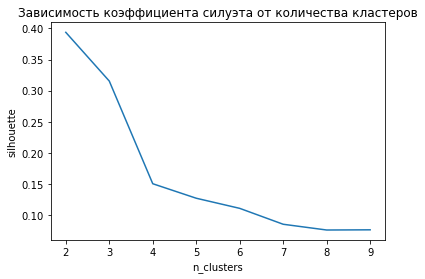

In [6]:
sns.lineplot(
    data = n_clusters_scales,
    x = 'n_clusters',
    y = 'silhouette',

    ).set_title('Зависимость коэффициента силуэта от количества кластеров');

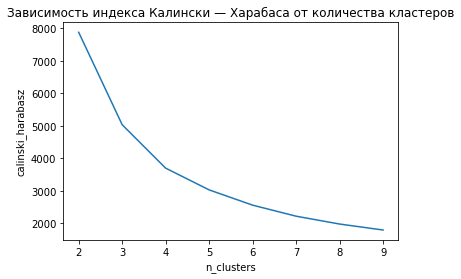

In [7]:
sns.lineplot(
    data = n_clusters_scales,
    x = 'n_clusters',
    y = 'calinski_harabasz'

    ).set_title('Зависимость индекса Калински — Харабаса от количества кластеров');

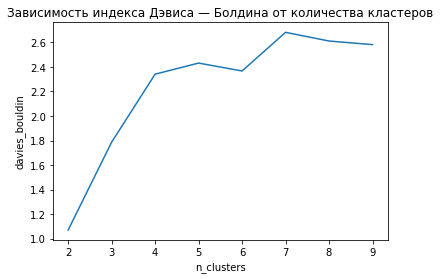

In [8]:
sns.lineplot(
    data = n_clusters_scales,
    x = 'n_clusters',
    y = 'davies_bouldin'

    ).set_title('Зависимость индекса Дэвиса — Болдина от количества кластеров');

Возможно, вам покажется удивительным, что все три меры единодушно показали такое расхождение с реальным разделением на кластеры. Однако это совершенно не значит, что они показывают неверные значения или что алгоритмы кластеризации работают некорректно. Возможно, такое разделение на другое количество кластеров можно объяснить — вы сами увидите это позднее.

### Задание 4.5

Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма k-means. Пусть количество кластеров будет соответствовать количеству активностей. Параметр random_state = 42. В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя.

In [9]:
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score
import numpy as np

kmeans = KMeans(
    n_clusters=6,
    random_state=42,
    init='random')    
kmeans.fit_predict(X_scaled)      

print('Однородность: {:.2f}'.format(homogeneity_score(Y, kmeans.labels_)))
print('Полнота : {:.2f}'.format(completeness_score(Y, kmeans.labels_)))
print('ARI (скорректированный индекс Рэнда) : {:.2f}'.format(
    adjusted_rand_score(Y, kmeans.labels_)))

Однородность: 0.54
Полнота : 0.58
ARI (скорректированный индекс Рэнда) : 0.42


### Задание 4.6

Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью). Нумерацию кластеров начинайте с 1.

Заметьте, что кластеры могут повторяться.

In [10]:
labels = pd.DataFrame({
    'Activity':Y,
    'Label':kmeans.labels_
})

labels = pd.DataFrame(
    labels.groupby(by=['Activity', 'Label'])['Label'].count().unstack()
)

labels.index = ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']
labels.columns = range(1,7)

labels

,1,2,3,4,5,6
ходьба,NaN,NaN,903.0,78.0,741.0,NaN
подъём,NaN,NaN,1242.0,5.0,295.0,2.0
спуск,NaN,NaN,321.0,196.0,889.0,NaN
сидение,91.0,1238.0,1.0,NaN,NaN,447.0
стояние,NaN,1346.0,NaN,NaN,NaN,560.0
лежание,1556.0,54.0,5.0,NaN,NaN,329.0


In [11]:
labels

,1,2,3,4,5,6
ходьба,NaN,NaN,903.0,78.0,741.0,NaN
подъём,NaN,NaN,1242.0,5.0,295.0,2.0
спуск,NaN,NaN,321.0,196.0,889.0,NaN
сидение,91.0,1238.0,1.0,NaN,NaN,447.0
стояние,NaN,1346.0,NaN,NaN,NaN,560.0
лежание,1556.0,54.0,5.0,NaN,NaN,329.0


In [12]:
# ЭТАЛОННОЕ РЕШЕНИЕ
#создаём таблицу сопряжённости
# ct = pd.crosstab(Y, kmeans.labels_)
ct = pd.crosstab(Y, kmeans.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
ct

,1,2,3,4,5,6
ходьба,0,0,903,78,741,0
подъём,0,0,1242,5,295,2
спуск,0,0,321,196,889,0
сидение,91,1238,1,0,0,447
стояние,0,1346,0,0,0,560
лежание,1556,54,5,0,0,329


### Задание 4.7

Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) и снова посмотреть, как алгоритм разобьёт активности по кластерам. Как и в предыдущем задании, нумерацию кластеров начинайте с 1.

In [13]:
kmeans = KMeans(
    n_clusters=2,
    random_state=42,
    init='random')    
kmeans.fit_predict(X_scaled)  

labels = pd.DataFrame({
    'Activity':Y,
    'Label':kmeans.labels_
})

labels = pd.DataFrame(
    labels.groupby(by=['Activity', 'Label'])['Label'].count().unstack(),
)

labels.index = ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']
labels.columns = range(1,3)

labels

,1,2
ходьба,1722.0,NaN
подъём,1536.0,8.0
спуск,1406.0,NaN
сидение,3.0,1774.0
стояние,NaN,1906.0
лежание,12.0,1932.0


Теперь вы видите, что разбиение на два кластера, которое нам навязчиво предлагали внутренние меры, вполне разумно, так как отражает два принципиально разных класса активностей: неподвижные и подвижные.

### Задание 4.8

Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя.

In [14]:
print('Полнота : {:.2f}'.format(completeness_score(Y, kmeans.labels_)))


Полнота : 0.98


### Задание 4.10

Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты.

1. Какой алгоритм показывает наилучшее качество, если судить по полноте?

In [15]:
from sklearn.cluster import AgglomerativeClustering

Y_pred = AgglomerativeClustering(n_clusters=2).fit_predict(X_scaled)

print('Полнота : {:.2f}'.format(completeness_score(Y, Y_pred)))

Полнота : 1.00


⭐ В этом юните мы потренировались в решении задачи кластеризации. Мы смогли сравнить два алгоритма с точки зрения внешних мер, а также увидеть, что расхождение показателей внутренних мер с предполагаемым разделением на кластеры не всегда говорит о плохо реализованных алгоритмах кластеризации: несмотря на то что наши алгоритмы предложили разделение на два кластера, а не на шесть, оно было обосновано наблюдаемыми признаками и содержательно интерпретировалось. Поэтому, даже если у вас есть разметка и вы можете пользоваться внешними мерами, советуем не пренебрегать внутренними, так как это поможет лучше узнать ваши данные.

В следующих юнитах мы познакомимся с алгоритмами снижения размерности. После этого предлагаем вам вернуться к данной задаче и попробовать улучшить качество кластеризации, уменьшив количество признаков.

# 5. PCA

✍ В этом юните мы разберём принцип решения задачи снижения размерности, а также рассмотрим один из алгоритмов, который используется для этой цели, — **PCA (Principal Component Analysis, метод главных компонент)**.

Размерность данных отражает количество содержащихся в них признаков. Если признаков очень много, можно столкнуться с **проклятием размерности**.

Ю **Проклятие размерности** — это проблема, связанная с экспоненциальным возрастанием объёма данных из-за увеличения размерности пространства.

Если размерность данных слишком велика, их обработка занимает чрезвычайно много времени, а их хранение требует большого объёма памяти, что, конечно, в целом затрудняет процесс работы. Поэтому количество признаков в данных необходимо уменьшить. Как это сделать?



### 1. Удаление (фильтрация) признаков

Удаление признаков может быть подходящим вариантом, когда, например, в них есть некорректные данные или так много пропусков, что эту информацию нельзя использовать для построения модели. Иногда удаляют малоинформативные признаки, которые принимают одни и те же значения или у которых очень слабая корреляция с целевой переменной. Есть и более сложные методы фильтрации — сейчас мы не будем на них останавливаться, однако обратим ваше внимание, что при удалении признаков мы практически всегда теряем какую-то информацию о данных.

Если вам интересно подробнее узнать о более сложных методах фильтрации, рекомендуем обратиться к статьям:

* [Обзор методов отбора признаков](https://habr.com/ru/company/jetinfosystems/blog/470622/);

* [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/) (более детальный разбор).

### 2. Извлечение новых признаков с помощью специальных алгоритмов

Создание новых признаков не даёт потерять важную информацию. Допустим, в нашем наборе данных есть 100 признаков. При извлечении признаков мы отказываемся от старых и создаём 100 новых независимых (таких, между которыми коэффициент корреляции равен нулю). Каждый новый признак представляет собой комбинацию старых. Независимые новые признаки определяются специальным алгоритмом (например, PCA) и упорядочиваются  по тому, насколько хорошо они сохраняют информацию о данных. После этого можно отбросить наименее важные новые признаки в зависимости от того, какую объяснённую дисперсию необходимо сохранить: допустим, первые 80 признаков из извлечённых 100 объясняют 95 % дисперсии и нас устраивает такой процент. Значит, мы отбрасываем последние 20 новых признаков.

В результате множества исследований было выявлено, что такое отбрасывание части новых признаков совершенно не мешает получать модели машинного обучения, которые будут показывать высокую эффективность. Например, для [распознавания лиц](https://bioramble.wordpress.com/2015/09/01/pca-part-5-eigenpets/) достаточно использовать лишь треть извлечённых из фотографий признаков, а для [обнаружения лактозы](https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/) в безлактозном молоке NIR-спектроскопией будет достаточно извлечь с помощью PCA всего лишь два признака из 601.

Представим, что мы хотим описать форму рыбы. Это можно сделать, например, с помощью её высоты (height) и длины (length):

![](https://lms.skillfactory.ru/assets/courseware/v1/afa3b02bb4b1107bf72eaf078d2e9859/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_5_1.png)

Однако, разумеется, эти признаки не являются независимыми друг от друга и довольно сильно коррелируют. Зная одно измерение для рыбы, мы, скорее всего, сможем предсказать по нему второе, то есть, по сути, мы можем описать форму рыбы с помощью только одного показателя. Причём важно отметить, что, когда мы говорим про один показатель, мы не отбрасываем длину рыбы или её высоту — вместо этого мы преобразуем эти два исходных признака в две ортогональные (независимые) компоненты, которые полностью описывают форму рыбы:

![](https://lms.skillfactory.ru/assets/courseware/v1/7f11cde8d32fc1a7e074d0b5dfe14ace/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_5_2.png)

Первая компонента (сплошная синяя стрелка) объясняет бόльшую часть вариации данных, а вторая (пунктирная синяя стрелка) — оставшуюся часть вариации. Обе они являются производными от высоты и длины.

На интуитивном уровне первую компоненту можно рассматривать как наиболее подходящий для описания данных вектор, который сводит к минимуму потерю информации. С другой стороны, её также можно рассматривать как линию, максимизирующую вариацию. В целом, если первая компонента объясняет достаточный для нас процент дисперсии, мы можем «отбросить» вторую.

Итак, в PCA признаки преобразуются в новый набор переменных с меньшим (или таким же) количеством измерений, сохраняя при этом как можно больше вариаций, присутствующих в наборе данных. Геометрически это значит, что метод главных компонент ищет гиперплоскость заданной размерности, при проекции на которую сумма квадратов расстояний от исходных точек будет минимальной. Это проиллюстрировано на анимации ниже:

![](https://lms.skillfactory.ru/assets/courseware/v1/9fa447b58cc57a0d9f4e8399196c80e7/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_5_3.gif)

Здесь мы хотим преобразовать два признака в один и ищем такой наклон прямой (новой компоненты), чтобы её сумма квадратов отклонений от объектов была минимальной.

### АЛГОРИТМ РЕАЛИЗАЦИИ PCA

1. Стандартизировать данные.

2. Рассчитать ковариационную матрицу для объектов.

3. Рассчитать собственные значения и собственные векторы для ковариационной матрицы.

4. Отсортировать собственные значения и соответствующие им собственные векторы.

5. Выбрать  наибольших собственных значений и сформировать матрицу соответствующих собственных векторов.

6. Преобразовать исходные данные, умножив матрицу данных на матрицу отобранных собственных векторов.

![](https://lms.skillfactory.ru/assets/courseware/v1/e9dfb175d1c9f15c98053c7c5db2d836/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_5_4.png)

Рассмотрим все шаги на примере.

**Примечание**. Так как в процессе реализации алгоритма мы будем сталкиваться с достаточно громоздкими вычислениями, часть из них мы будем сопровождать кодом для их выполнения в Python.

Допустим, у нас есть набор данных, состоящий из четырёх признаков:

$x_1$|$x_2$|$x_3$|$x_4$
-|-|-|-
1|2|3|4
5|5|6|7
1|4|2|3
5|3|2|1
8|1|2|2

Мы хотим сократить количество измерений до двух.

На первом шаге необходимо стандартизировать данные. Это делается по следующей формуле:

$$x_{n e w}=\frac{x-\mu}{\sigma}$$

Здесь:

* $\mu$ — среднее арифметическое признака;
* $\sigma$ — стандартное отклонение признака.

Давайте рассчитаем показатели средних арифметических и стандартных отклонений для наших признаков. Начнём с признака :

* Для признака  среднее арифметическое будет вычисляться так:

$\mu=\frac{1+5+1+5+8}{5}=4$

* Для расчёта стандартного отклонения для  необходимо вычислить все отклонения значений от среднего — они будут равняться:

$-3, 1, -3, 1, 4$

Возведём их в квадрат:

$9, 1, 9, 1, 16$

После этого разделим сумму квадратов на значение «объём выборки минус один» (так как мы ищем значения для выборки, а не для генеральной совокупности), чтобы получить дисперсию:

$\frac{9+1+9+1+16}{4}=9$

Извлечём корень, чтобы получить стандартное отклонение:

$\sqrt{9}=3$

Аналогичные вычисления сделаем и для других признаков — получим следующие результаты:

-|$x_1$|$x_2$|$x_3$|$x_4$
-|-|-|-|-
$\mu$|4|3|3|3.4
$\sigma$|3|1.58114|1.73205|2.30217

Теперь будем стандартизировать все имеющиеся у нас значения. Например, для первого значения признака  получим следующее:

$x_{11}=\frac{x_{11}-\mu_{x_{1}}}{\sigma_{x_{1}}}=\frac{1-4}{3}=-1$

Здесь за $x_{11}$ обозначено значение первого признака для первого объекта.

Для всех остальных значений произведём аналогичные вычисления и получим следующую таблицу:

$x_1$|$x_2$|$x_3$|$x_4$
-|-|-|-
-1|-0.63246|0|0.26062
0.33333|1.26491|1.73205|1.56374
-1|0.63246|-0.57735|-0.17375
0.33333|0|-0.57735|-1.04249
0.33333|-1.26491|-0.57735|-0.60812

Разумеется, все эти значения не требовалось вычислять самостоятельно. Код для их расчёта в Python будет следующим:

In [16]:
import numpy as np
import pandas as pd
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A,columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())
df_std

,x1,x2,x3,x4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


Перейдём ко второму шагу. Теперь нам необходимо вычислить ковариационную матрицу для наших стандартизированных данных. Для этого будем пользоваться следующей формулой:

$$\operatorname{Cov}(x, y)=\frac{\sum\left(x_{i}-\mu_{x}\right) *\left(y_{i}-\mu_{y}\right)}{(N-1)}$$

Здесь:

* $\mu$ — среднее арифметическое для признака;
* $N$ — объём выборки;
* $x_i$ и $y_i$ — значения признаков $x$ и $y$ для $i$-го объекта.

Нам будут нужны все попарные ковариации, а ковариация переменной с самой собой — это дисперсия:

-|$x_1$|$x_2$|$x_3$|$x_4$
-|-|-|-|-
$x_1$|$var(x_1)$|$cov(x_1, x_2)$|$cov(x_1, x_3)$|$cov(x_1, x_4)$
$x_2$|$cov(x_2, x_1)$|$var(x_2)$|$cov(x_2, x_3)$|$cov(x_2, x_4)$
$x_3$|$cov(x_3, x_1)$|$cov(x_3, x_2)$|$var(x_3)$|$cov(x_3, x_4)$
$x_4$|$cov(x_4, x_1)$|$cov(x_4, x_2)$|$cov(x_, x_3)$|$var(x_4)$

Так как мы стандартизировали данные, то для каждого признака среднее арифметическое равно $0$, а стандартное отклонение равно $1$. Значит, все дисперсии также равны $1$.

Вычислим ковариацию для признаков $x_1$ и $x_2$. Для этого сложим все произведения отклонений значений от средних и разделим получившуюся сумму на число «количество объектов минус один»:

$\frac{((-1.0-0)\times(-0.632456-0) + (0.33-0)\times(1.264911-0)+(-1.0-0)\times(0.632456-0)+ (0.33-0)\times(0.000000 -0)+(1.33-0)\times(-1.264911-0))}{4}=-0.3162$

Аналогичным образом можно вычислить другие ковариации — результатом станет приведённая ниже матрица ковариаций:

Разумеется, эти вычисления можно было реализовать с помощью Python следующим образом:

-|$x_1$|$x_2$|$x_3$|$x_4$
-|-|-|-|-
$x_1$| 1      |-0.31622| 0.04811|-0.18099
$x_2$|-0.31622| 1      | 0.63900| 0.61812
$x_3$| 0.04811| 0.63901| 1      | 0.94044
$x_4$|-0.18099| 0.61812| 0.94044| 1     

In [17]:
cov_mat = np.cov(df_std.T)
cov_mat

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

Следующим шагом нам необходимо вычислить собственные значения и собственные векторы для матрицы. Для этого надо решить уравнение:

$\left(\begin{array}{cccc}1-\lambda & -(0.31622) & 0.04811 & -(0.18099) \\ -(0.31622) & 1-\lambda & 0.63901 & 0.61812 \\ 0.04811 & 0.63901 & 1-\lambda & 0.94044 \\ -(0.18099) & 0.61812 & 0.94044 & 1-\lambda\end{array}\right) \times\left(\begin{array}{l}v_{1} \\ v_{2} \\ v_{3} \\ v_{4}\end{array}\right)=0$

Собственное значение здесь обозначено за $\lambda$, а собственный вектор — $v_{1}, v_{2}, v_{3}, v_{4}$.

Получится несколько собственных векторов, которые будут удовлетворять этому условию (т. е., по сути, четыре решения нашего уравнения):

* $e_1 \ (0.161960, -0.524048, -0.585896, -0.596547)$;
* $e_2 \ (-0.917059, 0.206922, -0.320539, -0.115935)$;
* $e_3 \ (-0.307071, -0.817319, 0.188250, 0.449733)$;
* $e_4 \ (0.196162, 0.120610, -0.720099, 0.654547)$.

С помощью Python их можно было бы найти следующим образом:

In [18]:
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)
eigen_val, eigen_vectors

(array([2.51579324, 1.0652885 , 0.39388704, 0.02503121]),
 array([[ 0.16195986, -0.91705888, -0.30707099,  0.19616173],
        [-0.52404813,  0.20692161, -0.81731886,  0.12061043],
        [-0.58589647, -0.3205394 ,  0.1882497 , -0.72009851],
        [-0.59654663, -0.11593512,  0.44973251,  0.65454704]]))

Теперь нам необходимо выбрать два собственных вектора, так как в итоге мы хотим получить две компоненты. Нужно взять векторы с наибольшими собственными значениями. При нахождении собственных векторов в Python они выводятся в соответствии с убыванием соответствующих собственных значений, поэтому берём первые два вектора:

* $e_1 \ (0.161960, -0.524048, -0.585896, -0.596547)$;
* $e_2 \ (-0.917059, 0.206922, -0.320539, -0.115935)$.

Осталось только найти главные компоненты. Для этого перемножаем матрицу стандартизированных признаков на матрицу с собственными векторами и получаем матрицу главных компонент:

$\left(\begin{array}{rrrr}-1.000000 & -0.632456 & 0.000000 & 0.260623 \\ 0.333333 & 1.264911 & 1.732051 & 1.563740 \\ -1.000000 & 0.632456 & -0.577350 & -0.173749 \\ 0.333333 & 0.000000 & -0.577350 & -1.042493 \\ 1.333333 & -1.264911 & -0.577350 & -0.608121\end{array}\right) \cdot \left(\begin{array}{rr}0.161960 & -0.917059 \\ -0.524048 & 0.206922 \\ -0.585896 & -0.320539 \\ -0.596547 & -0.115935\end{array}\right)=\left(\begin{array}{rr}0.014003 & 0.755975 \\ -2.556534 & -0.780432 \\ -0.051480 & 1.253135 \\ 1.014150 & 0.000239 \\ 1.579861 & -1.228917\end{array}\right)$

Таким образом, мы получили две главных компоненты. Можно проверить, получили ли бы мы тот же результат, если бы воспользовались сразу готовым алгоритмом на Python — [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

В параметр n_components в качестве значения можно передать количество необходимых компонентов или минимально допустимую объяснённую дисперсию в виде десятичной дроби. Например, если нам нужно столько компонент, чтобы они объясняли не менее 90 % разброса данных, то мы запишем n_components = 0.9.

In [19]:
#импортируем нужный алгоритм

from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.40033078e-02,  7.55974765e-01],
       [ 2.55653399e+00, -7.80431775e-01],
       [ 5.14801919e-02,  1.25313470e+00],
       [-1.01415002e+00,  2.38808310e-04],
       [-1.57986086e+00, -1.22891650e+00]])

Мы получили ровно такие же результаты. Разумеется, в будущем при решении практических задач вы сможете сразу использовать алгоритм PCA, не реализуя вручную всю последовательность действий.

### Задание 5.1

Найдите матрицу ковариаций для векторов $(3, 4, 1)$ и $(1, 6, 2)$. В качестве ответа укажите сумму всех значений матрицы, округлённую до двух знаков после точки-разделителя.

In [20]:
np.cov([3,4,1], [1,6,2]).sum().round(2)

14.33

### Задание 5.5

Дана матрица признаков:

In [21]:
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])

Какое минимальное количество главных компонент надо выделить, чтобы сохранить информацию о как минимум 90 % разброса данных?

In [22]:
from sklearn.preprocessing import StandardScaler
A_std = StandardScaler().fit_transform(np.asarray(A))
PCA(n_components=0.9).fit_transform(A_std).shape[1]

3

⭐ В этом юните мы разобрали один из методов снижения размерности — PCA: мы рассмотрели все этапы его реализации и смогли уменьшить количество признаков в нашем примере с четырёх до двух. В следующем юните мы рассмотрим ещё один метод, используемый для снижения размерности, — SVD. По сути, SVD — более общий алгоритм, из которого можно получить в том числе и PCA.

# 6. Снижение размерности: SVD и t-SNE

✍ В предыдущем юните мы обсудили, зачем снижать размерность данных, а также рассмотрели часто используемый для этого алгоритм — PCA. В данном юните мы изучим ещё два подхода к понижению размерности — **сингулярное разложение (SVD)** и **cтохастическое вложение соседей с t-распределением (t-SNE)**.

Начнём с сингулярного разложения. **SVD** используется не только для снижения размерности, но и в целом имеет множество применений в машинном обучении, например, в рекомендательных системах — в одном из следующих модулей вы сможете изучить эту тему подробнее.

Суть сингулярного разложения заключается в следующей теореме ↓

Любую прямоугольную матрицу $A$ размера $(n;m)$ можно представить в виде произведения трёх матриц:

$$A_{n \times m}=U_{n \times n} \cdot D_{n \times m} \cdot V_{m \times m}^{T}$$

В этой формуле:

 * $U$ — матрица размера $(n;n)$. Все её столбцы ортогональны друг другу и имеют единичную длину. Такие матрицы называются **ортогональными**. Эта матрица содержит нормированные собственные векторы матрицы $AA^T$.
 * $D$ — матрица размера $(n;m)$. На её главной диагонали стоят числа, называемые **сингулярными числами** (они являются корнями из собственных значений матриц $AA^T$ и $A^TA$), а вне главной диагонали стоят нули. Если мы решаем задачу снижения размерности, то элементы этой матрицы, если их возвести в квадрат, можно интерпретировать как дисперсию, которую объясняет каждая компонента.
 * $V$ — матрица размера $(m;m)$. Она тоже ортогональная и содержит нормированные собственные векторы матрицы $A^TA$.

Рассмотрим нахождение сингулярного разложения матрицы на примере ↓

*Допустим, нам необходимо получить сингулярное разложение для следующей матрицы:*

$$A=\left(\begin{array}{ccc}-1 & 1 & 0 \\ -1 & -1 & 1\end{array}\right)$$

Начнём с поиска матрицы $U$. Для этого нам необходимо сначала вычислить произведение матриц $A$ и $A^T$:

### Задание 6.1

Вычислите получившееся произведение матриц $A$ и $A^T$:

$A \cdot A^{T}=\left(\begin{array}{rrr}-1 & 1 & 0 \\ -1 & -1 & 1\end{array}\right) \cdot\left(\begin{array}{rr}-1 & -1 \\ 1 & -1 \\ 0 & 1\end{array}\right)$

In [23]:
A = np.array([
    [-1, 1 ,0],
    [-1, -1, 1],
])

A@A.T

array([[2, 0],
       [0, 3]])

Теперь нам необходимо решить характеристическое уравнение $det(A - \lambda E) = 0$:

$\operatorname{det}(A-\lambda E)=\left|\begin{array}{cc}2-\lambda & 0 \\ 0 & 3-\lambda\end{array}\right|$

Выражаем значение определителя и приравниваем его к нулю:

$(2-\lambda) \cdot(3-\lambda)-0 \cdot 0=0$

Получаем два собственных значения:

$\lambda_1 = 2, \ \lambda_2 = 3$

Теперь можно извлечь из них корень и получить сингулярные значения (они нужны для матрицы $D$):

$\sigma_1 = \sqrt{2}, \ \sigma_2 = \sqrt{3}$

Найдём собственный вектор, который соответствует первому собственному значению. Для этого решим следующее уравнение:

$\left(A-\lambda_{1} E\right) \vec{v}=\mathbf{0}$

$\left(\begin{array}{cc}2-2 & 0 \\ 0 & 3-2\end{array}\right) \cdot \overrightarrow{v_{1}}=0$

$\left(\begin{array}{cc}0 & 0 \\ 0 & 1\end{array}\right) \cdot \overrightarrow{v_{1}}=0$

$\overrightarrow{v_{1}}=\left(\begin{array}{c}-1 \\ 0\end{array}\right)$

Аналогично получаем второй вектор:

$\vec{v}_2 = \begin{pmatrix} 0 \\ -1\end{pmatrix}$

Нормируем их:

$\vec{v}_{1}=\frac{\vec{v}_{1}}{\left\|\vec{v}_{1}\right\|}=\frac{1}{\sqrt{(-1)^{2}+(0)^{2}}}\left(\begin{array}{l}-1 \\ 0\end{array}\right)=\left(\begin{array}{c}-1\\ 0 \end{array}\right)$

$\vec{v}_{2}=\frac{\vec{v}_{2}}{\left\|\vec{v}_{2}\right\|}=\frac{1}{\sqrt{(0)^{2}+(-1)^{2}}}\left(\begin{array}{l}0 \\ -1\end{array}\right)=\left(\begin{array}{c}0\\ -1 \end{array}\right)$

Отлично, мы нашли векторы, чтобы составить матрицу $U$.

Далее для нахождения матрицы $V$ нам необходимо вычислить произведение матрицы $A^T$ на матрицу $A$:

$A^{T} \cdot A=\left(\begin{array}{rr}-1 & -1 \\ 1 & -1 \\ 0 & 1\end{array}\right) \cdot\left(\begin{array}{rrr}-1 & 1 & 0 \\ -1 & -1 & 1\end{array}\right)=\left(\begin{array}{rrr}2 & 0 & -1 \\ 0 & 2 & -1 \\ -1 & -1 & 1\end{array}\right)$

Находим собственные значения для получившейся матрицы:

$\operatorname{det}(A-\lambda E)=\lambda_{A^{\top} A}=\left|\begin{array}{ccc}2-\lambda & 0 & -1 \\ 0 & 2-\lambda & -1 \\ -1 & -1 & 1-\lambda\end{array}\right|$

Выражаем определитель и производим элементарные преобразования, чтобы упростить выражение:

$\left|\begin{array}{ccc}2-x & 0 & -1 \\ 0 & 2-x & -1 \\ -1 & -1 & 1-x\end{array}\right|=(2-x) \cdot\left|\begin{array}{cc}2-x & -1 \\ -1 & 1-x\end{array}\right|-1 \cdot\left|\begin{array}{cc}0 & 2-x \\ -1 & -1\end{array}\right|=$

$=(2-x) \cdot((2-x) \cdot(1-x)-1)-(0+(2-x))=$

$=(2-x) \cdot((2-x) \cdot(1-x)-1-1)=$

$=(2-x) \cdot((2-x) \cdot(1-x)-2)=$

$=(2-x) \cdot\left(-2 x-x+x^{2}-2\right)=$

$=(2-x) \cdot\left(-3 x+x^{2}\right)=$

$=(2-x) \cdot x(-3+x)=0$

Решая данное уравнение, получаем следующие собственные значения:

$\lambda_1 = 3$

$\lambda_2 = 2$

$\lambda_3 = 0$

Далее нужно найти сингулярные значения. Для этого просто извлечём корни из собственных значений:

$\sigma_1 = \sqrt{3}$

$\sigma_2 = \sqrt{2}$

$\sigma_3 = 0$

Теперь мы можем составить диагональную матрицу $D$:

$D \in \mathbb{R}^{2 \times 3}, D=\left(\begin{array}{ccc}\sqrt{3} & 0 & 0 \\ 0 & \sqrt{2} & 0\end{array}\right)$

Далее находим собственные векторы:

$\left(A-\lambda_{1} E\right) \vec{v}=\mathbf{0}$

$\lambda_{1}=3$

$\left(\begin{array}{ccc}2-3 & 0 & -1 \\ 0 & 2-3 & -1 \\ -1 & -1 & 1-3\end{array}\right)=\left(\begin{array}{ccc}-1 & 0 & -1 \\ 0 & -1 & -1 \\ -1 & -1 & -2\end{array}\right)=$

$=\left(\begin{array}{ccc}-1 & 0 & -1 \\ 0 & -1 & -1 \\ 0 & -1 & -1\end{array}\right)=\left(\begin{array}{ccc}-1 & 0 & -1 \\ 0 & -1 & -1 \\ 0 & 0 & 0\end{array}\right)$

$\left(\begin{array}{ccc}-1 & 0 & -1 \\ 0 & -1 & -1 \\ 0 & 0 & 0\end{array}\right) \cdot \overrightarrow{v_{1}}=0$

$\overrightarrow{v_{1}}=\left(\begin{array}{c}1 \\ 1 \\ -1\end{array}\right)$

Аналогичным образом находим ещё два собственных вектора. Первый из них (соответствующий собственному значению 2) будет равен $(1,-1,0)$.

Далее нам необходимо нормировать найденные собственные векторы:

$\overrightarrow{v_{1}}=\frac{1}{\sqrt{3}} \cdot\left(\begin{array}{c}1 \\ 1 \\ -1\end{array}\right)$

$\overrightarrow{v_{2}}=\frac{1}{\sqrt{2}} \cdot\left(\begin{array}{c}1 \\ -1 \\ 0\end{array}\right)$

$\overrightarrow{v_{3}}=\frac{1}{\sqrt{6}} \cdot\left(\begin{array}{c}1 \\ 1 \\ 2\end{array}\right)$

Теперь мы можем записать соответствующую матрицу . Для этого полученные собственные векторы располагаем в столбцах матрицы в порядке убывания их собственных чисел:

$V=\frac{1}{\sqrt{6}} \cdot\left(\begin{array}{ccc}\sqrt{2} & \sqrt{3} & 1 \\ \sqrt{2} & -\sqrt{3} & 1 \\ -\sqrt{2} & 0 & 2\end{array}\right)$

Теперь собираем все полученные матрицы и в итоге получаем следующее сингулярное разложение:

$A=\underbrace{\left(\begin{array}{cc}0 & -1 \\ -1 & 0\end{array}\right)}_{U} \times\left(\begin{array}{ccc}\sqrt{3} & 0 & 0 \\ 0 & \sqrt{2} & 0\end{array}\right) \times \frac{1}{\sqrt{6}} \cdot \underbrace{\left(\begin{array}{ccc}\sqrt{2} & \sqrt{2} & -\sqrt{2} \\ \sqrt{3} & -\sqrt{3} & 0 \\ 1 & 1 & 2\end{array}\right)}_{V^{T}}$

Здесь вы видите полное сингулярное разложение. Однако если мы захотим уменьшить размерность, то можем просто отобрать  наибольших собственных значений и записать разложение для них.

Для того чтобы реализовать сингулярное разложение с помощью библиотеки sklearn, необходимо использовать алгоритм TruncatedSVD(), в который передаётся n_components в качестве параметра, определяющего количество итоговых компонент:

```py
# создаём объект класса TruncatedSVD
# n_components — размерность нового пространства, n_iter — количество итераций
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# обучаем модель на данных X
svd.fit(X)
# применяем уменьшение размерности к матрице X
transformed = svd.transform(data)
```

Итак, вы уже знакомы с двумя алгоритмами для понижения размерности — PCA и SVD. Теперь давайте познакомимся с третьим — t-SNE (стохастическое вложение соседей с t-распределением). Его преимущество относительно первых двух заключается в том, что он может реализовывать уменьшение размерности и разделение для данных, которые являются линейно неразделимыми. Подобные данные можно визуализировать так:

![](https://lms.skillfactory.ru/assets/courseware/v1/66b934169bf2fd39833d074026308c65/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_1.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/307510f1e8f86326e2b73a5e21000458/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_2.png)

Предположим, что у нас есть набор данных, состоящий из трёх различных классов:

![](https://lms.skillfactory.ru/assets/courseware/v1/447c52cb0275eb4d2ce2801980149d8b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_3.png)

Мы хотим снизить размерность, уменьшив число признаков с двух до одного, сохраняя при этом чёткие границы между кластерами:

![](https://lms.skillfactory.ru/assets/courseware/v1/181866735ffbcab8d77939b613d48319/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_4.png)

Простая проекция точек на прямую будет плохим вариантом, так как мы потеряем значительный объём информации (на графике ниже можно видеть, что точки, находящиеся далеко друг от друга, на прямой оказываются близко):

![](https://lms.skillfactory.ru/assets/courseware/v1/1778adb5da258c46f9d90d1c53355334/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_5.png)

Вместо этого можно использовать технику уменьшения размерности (t-SNE). Первый шаг в алгоритме t-SNE включает в себя измерение расстояния от одной точки до всех остальных. Изначально эти расстояния измеряются с помощью обычного евклидова расстояния, а затем сопоставляются со значениями вероятностей:

![](https://lms.skillfactory.ru/assets/courseware/v1/aab9ecd1a07d4d9391daa95991706b3f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_6.png)

В получившемся распределении точки с наименьшим расстоянием до рассматриваемой точки имеют высокую вероятность быть её соседями, а точки, удалённые от рассматриваемой точки, имеют очень низкие вероятности быть её соседями. По сути, вероятность пропорциональна расстоянию.

![](https://lms.skillfactory.ru/assets/courseware/v1/a3acf819f50854dc9c952bd9402fab02/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_7.png)

Однако здесь возникает следующая проблема: у разных кластеров разная плотность. Чтобы учитывать информацию об этом, мы будем нормировать каждую вероятность на сумму вероятностей для точек этого кластера:

![](https://lms.skillfactory.ru/assets/courseware/v1/bdc9d5063bd7132eead7645648944406/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_8.png)

Таким образом, хотя абсолютное (евклидово) расстояние между точками различно, показатель близости для них получается одинаковым.

Давайте попробуем выразить это с помощью математических формулировок.

Вы знаете, что функция плотности для нормального распределения записывается следующим образом:

$$P(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^{2} /\left(2 \sigma^{2}\right)}$$

Если мы опустим множитель перед экспонентой, заменим среднее арифметическое на другую точку и отмасштабируем полученное значение, то получим следующее выражение:

$$p_{j \mid i}=\frac{\exp \left(-\left\|x_{i}-x_{j}\right\|^{2} / 2 \sigma_{i}^{2}\right)}{\sum_{k \neq i} \exp \left(-\left\|x_{i}-x_{k}\right\|^{2} / 2 \sigma_{i}^{2}\right)}$$

Таким образом мы можем вычислить показатель, отражающий, насколько точка  близка к точке  при гауссовском распределении, сформированном с математическим ожиданием, равным , и с некоторым , которое выбирается таким образом, чтобы у объектов в областях с большей плотностью была более маленькая дисперсия.

Теперь давайте рассмотрим оценки близости для точек, которые получились в результате снижения размерности. Найдём для них ровно тот же показатель:

$$q_{j \mid i}=\frac{\exp \left(-\left\|y_{i}-y_{j}\right\|^{2}\right)}{\sum_{k \neq i} \exp \left(-\left\|y_{i}-y_{k}\right\|^{2}\right)}$$

Если между точками $y_i$ и $y_j$ будет такое же сходство, как и между изначальными точками $x_i$ и $j_i$, то значения соответствующих условных вероятностей $p_{j \mid i}$ и $q_{j \mid i}$ будут эквивалентными. Чтобы оценить, насколько $q_{j \mid i}$ близко к $p_{j \mid i}$, используется дивергенция (расстояние) Кульбака — Лейблера (иногда его обозначают просто как KL). Чем ниже значение расстояния KL, тем ближе два распределения друг к другу. Расстояние KL, равное 0, подразумевает, что два рассматриваемых распределения идентичны.

Ниже вы можете видеть сравнение распределений и значение расстояния Кульбака — Лейблера для них:

![](https://lms.skillfactory.ru/assets/courseware/v1/b6fbe10ac7b12ef4cc041d7a1b176390/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_9.png)

Ранее, для того чтобы найти наиболее подходящую функцию, описывающую наши данные, мы применяли градиентный спуск для минимизации функционала ошибки. Здесь мы будем использовать ту же идею — будем минимизировать KL-расстояние с помощью градиентного спуска. Тогда функция потерь будет выражаться следующим образом:

$$\mathrm{C}=\sum_{i} K L\left(P_{i} \| Q_{i}\right)=\sum_{i} \sum_{j} p_{j \mid i} \log \frac{p_{j \mid i}}{q_{j \mid i}}$$



Берём частную производную нашей функции потерь по каждой точке:

$$\frac{\partial \mathrm{C}}{\partial y_{i}}=2 \sum_{j}\left(p_{j \mid i}-q_{j \mid i}+p_{i \mid j}-q_{i \mid j}\right)\left(y_{i}-y_{j}\right)$$

Мы рассмотрели классический вариант SNE, однако при его использовании мы сталкиваемся с проблемой: после снижения размерности расстояние между двумя точками должно быть значительно больше расстояния, которое можно получить в гауссовом распределении. Эту проблему называют «**проблемой скученности**», и для её решения используют **распределение Стьюдента**. Оно похоже на распределение Гаусса (и для больших выборок практически совпадает с ним), однако имеет большие вероятности на участках, отдалённых от нуля. Сравнение распределений Гаусса и Стьюдента можно увидеть на графике ниже:

![](https://lms.skillfactory.ru/assets/courseware/v1/e2d17e7208e4fad45bda2ae720d91ee6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_6_10.png)

По оси ординат здесь отложены вероятности, а по оси абсцисс — стандартные отклонения.

В t-SNE используется именно распределение Стьюдента. Тогда показатель близости (вероятность) будет вычисляться следующим образом:

$$q_{i j}=\frac{\left(1+\left\|y_{i}-y_{j}\right\|^{2}\right)^{-1}}{\sum_{k \neq l}\left(1+\left\|y_{k}-y_{l}\right\|^{2}\right)^{-1}}$$

Градиент функции потерь, соответственно, примет следующий вид:

$$\frac{\partial C}{\partial y_{i}}=4 \sum_{j}\left(p_{i j}-q_{i j}\right)\left(y_{i}-y_{j}\right)\left(1+\left\|y_{i}-y_{j}\right\|^{2}\right)^{-1}$$

Для реализации t-SNE в sklearn понадобится алгоритм [TSNE()](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html):

```py
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE
# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и применяем к матрице X уменьшение размерности
tsne.fit_transform(X)
```



Итак, теперь вы знаете обо всех основных метода снижения размерности. Благодаря этому вы сможете бороться с проклятием размерности, повышать скорость своей работы и улучшать качество результатов при решении задач. Уже в следующем юните у вас появится возможность применить полученные знания на практике →

# 7. Снижение размерности. Практика

✍ В предыдущих юнитах вы познакомились с алгоритмами снижения размерности, и теперь можно считать, что вы обладаете знаниями обо всех основных аспектах кластеризации и уменьшения размерности.

Давайте потренируемся и применим полученные знания для решения очередной практической задачи.

Представьте, что вы работаете в международной гуманитарной организации, главная задача которой — борьба с бедностью и помощь людям из наименее развитых стран. Для выполнения своей миссии ваша организация периодически финансирует различные проекты, поддерживающие нуждающиеся регионы.

Вы собрали 100 миллионов долларов и должны принять решение, как распределить эти деньги — в какие страны их направить в первую очередь. Как выбрать, кто сильнее всего нуждается в финансовой поддержке?

Конечно, можно взять страны с самыми низкими доходами населения или с самой маленькой продолжительностью жизни. А может, лучше помочь странам, у которых самая высокая инфляция? По отдельным признакам выбирать достаточно сложно — нам хотелось бы выявить группы стран, в которых в целом ситуация вызывает опасения по совокупности значений всех признаков.

![](https://lms.skillfactory.ru/assets/courseware/v1/b5cc99e8741571ae77e8b1e6ec51523b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md11_7_1.jpg)

Для решения этой задачи мы как раз и используем наши навыки в снижении размерности и кластеризации данных: попробуем выделить кластеры стран, схожих по своим характеристикам, и среди них выявить кластер особо нуждающихся.

[Данные](https://lms.skillfactory.ru/assets/courseware/v1/f016ad7332eb21f14106f7aa59e7c74e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/Country-data.zip) содержат следующие признаки:

* `country` — название страны;
* `child_mort` — показатель смертности детей до 5 лет;
* `exports` — показатель экспорта на душу населения;
* `health` — показатель затрат на здравоохранение на душу населения;
* `imports` — показатель импорта на душу населения;
* `Income` — средний доход на душу населения;
* `Inflation` — годовой показатель инфляции;
* `life_expec` — средняя продолжительность жизни;
* `total_fer` — суммарный коэффициент рождаемости;
* `gdpp` — значение ВВП на душу населения.

### Задание 7.1

Каково максимальное значение показателя средней продолжительности жизни среди представленных стран? Ответ округлите до одного знака после точки-разделителя.

In [1]:
import pandas as pd

data = pd.read_csv('data/Country-data.zip', index_col='country')

data.sort_values(by='life_expec', ascending=False)[['life_expec']]

,life_expec
country,
Japan,82.8
Singapore,82.7
Switzerland,82.2
Iceland,82.0
Australia,82.0
...,...
Malawi,53.1
Zambia,52.0
Central African Republic,47.5


### Задание 7.2

Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.

In [2]:
from sklearn.preprocessing import StandardScaler

data_scaled = pd.DataFrame(
    StandardScaler().fit_transform(data),
    index=data.index,
    columns=data.columns)

display(data_scaled.head())

data_scaled.iloc[0][0].round(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


1.29

### Задание 7.3

Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

<AxesSubplot:>

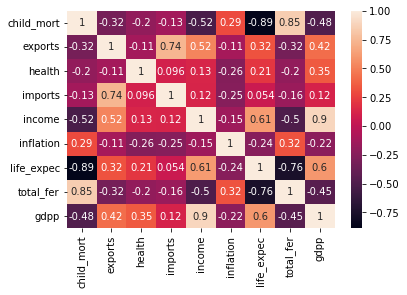

In [3]:
import seaborn as sns
sns.heatmap(
    data_scaled.corr(),
    annot=True)



### Задание 7.4

Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [4]:
#импортируем нужный алгоритм
from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(data_scaled)
principalComponents.shape[1]

5

Отлично! Можно отметить, что для того, чтобы объяснить бόльшую часть дисперсии, совершенно не требуется брать все признаки.

### Задание 7.5

Какую долю дисперсии объясняет первая главная компонента среди главных компонент, полученных в предыдущем задании? Ответ округлите до двух знаков после точки-разделителя.

In [5]:
pca.explained_variance_ratio_[0].round(2)

0.46

### Задание 7.6

Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают $0.001$, не считая единичных значений на главной диагонали?

In [15]:
pd.DataFrame(principalComponents).corr().round(4)

,0,1,2,3,4
0,1.0,0.0,-0.0,-0.0,-0.0
1,0.0,1.0,-0.0,-0.0,-0.0
2,-0.0,-0.0,1.0,0.0,0.0
3,-0.0,-0.0,0.0,1.0,-0.0
4,-0.0,-0.0,0.0,-0.0,1.0


Как видим, даже самый большой коэффициент корреляции практически неотличим от нуля — это значит, что мы всё сделали правильно, и теперь у нас есть пять независимых признаков, объясняющих до 90 % дисперсии.

### Задание 7.7

Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

c:\Users\Home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

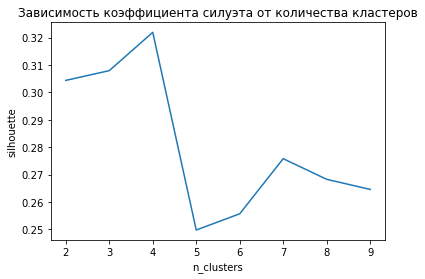

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data_pca = pd.DataFrame(principalComponents)

silhouette = []

for n in range(2,10):    
    kmeans = KMeans(
        n_clusters=n,
        random_state=1)    
    kmeans.fit_predict(data_pca)      
    silhouette.append(silhouette_score(data_pca, kmeans.labels_))

n_clusters_scales = pd.DataFrame({
    'n_clusters':range(2,10),
    'silhouette':silhouette,
})

sns.lineplot(
    data = n_clusters_scales,
    x = 'n_clusters',
    y = 'silhouette',

    ).set_title('Зависимость коэффициента силуэта от количества кластеров');

### Задание 7.8

Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means++ с этим параметром. В качестве значения random_state возьмите число 1.

В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?

In [24]:
kmeans = KMeans(
    n_clusters=4,
    random_state=1)    
kmeans.fit_predict(data_pca)      


c:\Users\Home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 0, 1, 3, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

In [25]:
data['label'] = kmeans.labels_



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [29]:
data.sort_values(by=['child_mort', 'gdpp'], ascending=[False, True])[['child_mort','gdpp', 'label']]

,child_mort,gdpp,label
country,,,
Haiti,208.0,662,1
Sierra Leone,160.0,399,1
Chad,150.0,897,1
Central African Republic,149.0,446,1
Mali,137.0,708,1
...,...,...,...
Finland,3.0,46200,3
Sweden,3.0,52100,3
Singapore,2.8,46600,2


### Задание 7.9

Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи. Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая продолжительность жизни.

Отметьте эти страны:

In [31]:
data[data['label']==1].sort_values(by='life_expec')[['life_expec']][:3]

,life_expec
country,
Haiti,32.1
Lesotho,46.5
Central African Republic,47.5


⭐ Поздравляем! Вы решили поставленную перед вами задачу, и теперь деньги, собранные вашей благотворительной организацией, пойдут в действительно нуждающиеся страны.

В этом юните вы потренировались в использовании PCA и увидели, что количество признаков можно сократить довольно сильно, практически не теряя информации о данных. Это может быть полезно, если у наблюдений очень много характеристик — сокращение размерности данных позволяет как получать более точные результаты, так и экономить время, затрачиваемое на вычислительные операции.

⭐ Поздравляем, вы завершили изучение алгоритмов кластеризации и снижения размерности.

В рамках данного модуля вы:

* научились оценивать качество кластеризации с помощью внутренних и внешних мер, а также подробно разобрали математические алгоритмы вычисления этих мер;
* изучили алгоритмы снижения размерности PCA и SVD: рассмотрели их математическую составляющую и узнали, как они применяются в анализе данных;
* решили две объёмных прикладных задачи, в которых потренировались применять полученные знания и навыки на практике.

Если вам интересно изучить дополнительные материалы по кластеризации и снижению размерности, рекомендуем прочитать следующие статьи:

* [Подбор платья с помощью PCA](https://habr.com/ru/company/io/blog/265089/)
* [Аналитический разбор PCA с использованием матричных представлений](https://habr.com/ru/post/507618/)
* [Простое пояснение работы PCA на примере выбора вина](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)
* [Обзор 17 методов кластеризации](https://towardsdatascience.com/17-clustering-algorithms-used-in-data-science-mining-49dbfa5bf69a)
* [Интересное видео из курса по линейной алгебре](https://www.youtube.com/watch?v=PFDu9oVAE-g), более углублённо поясняющее суть применения собственных векторов для PCA.

Это был последний модуль, в котором вы погружались в математические основы машинного обучения. Теперь вы не просто умеете реализовывать различные алгоритмы, но и понимаете, как именно они работают.

Помните, что зазубривать все формулы совершенно необязательно. Знание математического фундамента, на котором стоят алгоритмы, нужно лишь для того, чтобы понимать, как работает метод, понимать область его применения и уметь быстро разобраться, почему получаются некорректные результаты.

[Скачайте](https://lms.skillfactory.ru/assets/courseware/v1/d8a9e55a8a00cb160f70ba5ac922c44d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/DST_%D0%91%D0%BB%D0%BE%D0%BA_6_%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_MATH_ML-11._%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8_%D1%82%D0%B5%D1%85%D0%BD%D0%B8%D0%BA%D0%B8_%D0%BF%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8._%D0%A7%D0%B0%D1%81%D1%82%D1%8C_II.pdf) конспект к модулю ↓ — он поможет вам лучше структурировать материал и время от времени возвращаться к самым важным понятиям и принципам.